In [92]:
from pathlib import Path

import numpy as np
import pandas as pd
from scipy.stats import rankdata, spearmanr

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [123]:
out_dirs = [Path(dirname) for dirname in ["heatmap_run1", "heatmap_run2", "heatmap_run3", "heatmap_run4", "heatmap_run5"]]
reps = ["fairseq.wmt14.en-fr.fconv", "dissent.books8.epoch9"]
np.random.shuffle(reps)

rep1, rep2 = reps
names = ["rep", "idx", "dist", "sent1", "sent2"]

dists = []
for out_dir in out_dirs:
    try:
        dists_i = pd.read_csv(out_dir / ("sim_384sentences.%s_384sentences.%s.csv" % (rep1, rep2)), header=None, names=names)
    except FileNotFoundError:
        dists_i = pd.read_csv(out_dir / ("sim_384sentences.%s_384sentences.%s.csv" % (rep2, rep1)), header=None, names=names)
        
    dists_i = dists_i.reset_index().set_index(["rep", "sent1", "sent2"]).sort_index()
    dists.append(dists_i)
    
dists = sum(dists) / len(dists)

In [124]:
dists.head()

index  \
rep                                sent1                                              sent2                                                         
384sentences.dissent.books8.epoch9 A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...    144.2   
                                                                                      A bed is a piece of furniture used as a place t...  31557.0   
                                                                                      A bed is made of a mattress and a box spring, p...   6217.8   
                                                                                      A bee is a flying insect, with a black and yell...    886.6   
                                                                                      A bicycle is a vehicle with two wheels and peda...   7844.8   

                                                                                                                                              idx  \
rep                                sent1                                              sent2                                                         
384sentences.dissent.books8.epoch9 A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...    144.2   
                                                                                      A bed is a piece of furniture used as a place t...  31557.0   
                                                                                      A bed is made of a mattress and a box spring, p...   6217.8   
                                                                                      A bee is a flying insect, with a black and yell...    886.6   
                                                                                      A bicycle is a vehicle with two wheels and peda...   7844.8   

                                                                                                                                              dist  
rep                                sent1                                              sent2                                                         
384sentences.dissent.books8.epoch9 A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...  0.509983  
                                                                                      A bed is a piece of furniture used as a place t...  1.002565  
                                                                                      A bed is made of a mattress and a box spring, p...  0.900104  
                                                                                      A bee is a flying insect, with a black and yell...  0.739640  
                                                                                      A bicycle is a vehicle with two wheels and peda...  0.906504

In [125]:
pair_dists_rep1 = dists.loc["384sentences.%s" % rep1].dist
pair_dists_rep2 = dists.loc["384sentences.%s" % rep2].dist

In [126]:
pair_dists_rep1.head()

sent1                                                                      sent2                                                                         
A banana is a long fruit that grows in bunchs, with a soft edible inside.  A banana when ripe can be yellow, purple or red and have small brown spots.       0.509983
                                                                           A bed is a piece of furniture used as a place to sleep or have sex in.            1.002565
                                                                           A bed is made of a mattress and a box spring, plus sheets, pillows and covers.    0.900104
                                                                           A bee is a flying insect, with a black and yellow body and six legs.              0.739640
                                                                           A bicycle is a vehicle with two wheels and pedals on a frame.                     0.906504
Name: dist, dtyp

In [127]:
spearmanr(pair_dists_rep1, pair_dists_rep2)

SpearmanrResult(correlation=0.69535698929201883, pvalue=0.0)

Let's create and analyze rank data for the pairwise distance measures. Here a low pairwise rank = low pairwise distance = high pairwise similarity.

In [128]:
rep1_ranks = rankdata(pair_dists_rep1)
rep2_ranks = rankdata(pair_dists_rep2)

In [129]:
list(zip(rep1_ranks, rep2_ranks))[:20]

[(146.0, 87.0),
 (31874.0, 47816.0),
 (6196.0, 14213.0),
 (824.0, 4239.0),
 (6872.0, 4455.0),
 (13921.0, 15955.0),
 (60969.0, 65566.0),
 (48341.0, 58907.0),
 (8084.0, 14501.0),
 (19592.0, 40231.0),
 (35002.0, 42024.5),
 (1422.0, 2251.0),
 (57251.0, 71942.0),
 (43923.0, 19101.0),
 (868.0, 1468.0),
 (13440.0, 1372.0),
 (5466.0, 9587.0),
 (40087.5, 46970.0),
 (4309.0, 3624.0),
 (22321.0, 17630.0)]

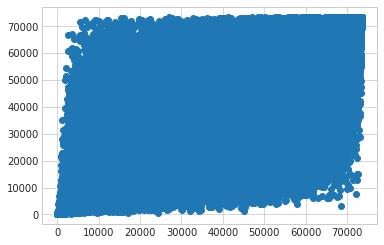

In [130]:
plt.scatter(rep1_ranks, rep2_ranks)

In [131]:
# Add rank information to main dataframe.
dists.loc[("384sentences.%s" % rep1, slice(None), slice(None)), "dist_rank"] = rep1_ranks
dists.loc[("384sentences.%s" % rep2, slice(None), slice(None)), "dist_rank"] = rep2_ranks
dists.head()

index  \
rep                                sent1                                              sent2                                                         
384sentences.dissent.books8.epoch9 A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...    144.2   
                                                                                      A bed is a piece of furniture used as a place t...  31557.0   
                                                                                      A bed is made of a mattress and a box spring, p...   6217.8   
                                                                                      A bee is a flying insect, with a black and yell...    886.6   
                                                                                      A bicycle is a vehicle with two wheels and peda...   7844.8   

                                                                                                                                              idx  \
rep                                sent1                                              sent2                                                         
384sentences.dissent.books8.epoch9 A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...    144.2   
                                                                                      A bed is a piece of furniture used as a place t...  31557.0   
                                                                                      A bed is made of a mattress and a box spring, p...   6217.8   
                                                                                      A bee is a flying insect, with a black and yell...    886.6   
                                                                                      A bicycle is a vehicle with two wheels and peda...   7844.8   

                                                                                                                                              dist  \
rep                                sent1                                              sent2                                                          
384sentences.dissent.books8.epoch9 A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...  0.509983   
                                                                                      A bed is a piece of furniture used as a place t...  1.002565   
                                                                                      A bed is made of a mattress and a box spring, p...  0.900104   
                                                                                      A bee is a flying insect, with a black and yell...  0.739640   
                                                                                      A bicycle is a vehicle with two wheels and peda...  0.906504   

                                                                                                                                          dist_rank  
rep                                sent1                                              sent2                                                          
384sentences.dissent.books8.epoch9 A banana is a long fruit that grows in bunchs, ... A banana when ripe can be yellow, purple or red...      146.0  
                                                                                      A bed is a piece of furniture used as a place t...    31874.0  
                                                                                      A bed is made of a mattress and a box spring, p...     6196.0  
                                                                                      A bee is a flying insect, with a black and yell...      824.0  
                                                                                      A bicycle is a 

## Rank differences

Let's compare differences in the ranks of sentence pair distances, arbitrarily taking the difference `rep1_rank - rep2_rank`. Highly negative values indicate that `rep1` ranks the pair far lower distance (higher similarity) than `rep2`.

In [132]:
dist_rank_differences = dists.loc["384sentences.%s" % rep1].dist_rank - dists.loc["384sentences.%s" % rep2].dist_rank
dist_rank_differences.head()

sent1                                                                      sent2                                                                         
A banana is a long fruit that grows in bunchs, with a soft edible inside.  A banana when ripe can be yellow, purple or red and have small brown spots.          59.0
                                                                           A bed is a piece of furniture used as a place to sleep or have sex in.           -15942.0
                                                                           A bed is made of a mattress and a box spring, plus sheets, pillows and covers.    -8017.0
                                                                           A bee is a flying insect, with a black and yellow body and six legs.              -3415.0
                                                                           A bicycle is a vehicle with two wheels and pedals on a frame.                      2417.0
Name: dist_rank, dtyp

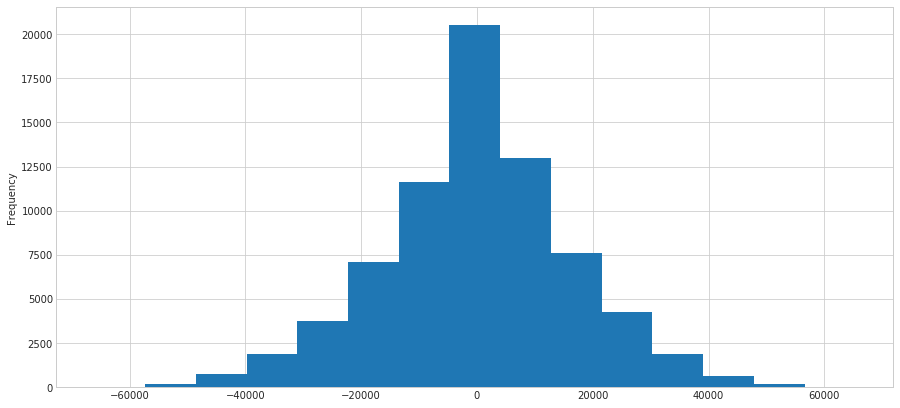

In [133]:
f, ax = plt.subplots(figsize=(15, 7))
dist_rank_differences.plot.hist(bins=15, ax=ax)

Let's look at the extremes of the rank difference series. Extremely negative sentence pairs here are those scored highly similar by `rep1` relative to `rep2`.

In [134]:
pd.set_option("max_rows", 500)
dist_rank_differences.sort_values()

sent1                                                                                  sent2                                                                                  
A mug is a sturdy cup with a handle for drinking hot liquids.                          A refrigerator is a cooling device used to contain and preserve food.                     -66092.0
Most sharks predate on fish and mammals, with powerful jaws.                           There are many varieties of tomato, with different sizes and tastes.                      -65575.0
The claws of cats are retractable so that they keep sharp.                             A knife is a tool with a sharp edge that is used to cut things.                           -64173.0
A horse is a large hoofed mammal with four long, muscular legs.                        A woman has different reproductive organs than a man.                                     -63638.0
The food is cooked on oil covering the bottom of the pan.                        

In [135]:
dist_rank_differences[dist_rank_differences.abs() <= 10].sort_values()

sent1                                                                                 sent2                                                                             
A bed is made of a mattress and a box spring, plus sheets, pillows and covers.        Television content can be broadcast or received via cable or internet.               -10.0
Peaches have a large, red-brown stone inside which contains the seed.                 Spiders can be as small as a coin or as big as a bird.                               -10.0
Murder is the unlawful killing of another human being with intent.                    Murder a serious crime because it deprives the victim of their existence.            -10.0
Tropical cyclone can also cause high waves and coastal flooding.                      A tropical cyclone can move inland and seriously damage property.                    -10.0
The term is used to indicate sex distinctions relative to girls.                      A mitten is a kind of glove where the

After blind reviewing above, reveal the identities of rep1 and rep2 below....

t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t
t

t

t

t

In [136]:
rep1

'dissent.books8.epoch9'

In [137]:
rep2

'fairseq.wmt14.en-fr.fconv'